# Linear Discriminant Analysis (LDA)

### LDA를 위한 가정
- 각 숫자 집단은 정규분포 형태의 확률분포를 가진다.
- 각 숫자 집단은 비슷한 형태의 공분산 구조를 가진다.

### LDA 결과 얻게되는 Decision boundary의 특징
- Boundary에 직교하는 축
    - 자료들을 이 축에 정사영 시킨 분포의 형태를 고려.
        > 정사영 : 빛과 수직인 평면에 생기는 그림자
    
- 평균의 차이를 극대화 하려면?
    - 두 평균 vector의 차이 벡터를 이용.
    
- 정사영시킨 두 분포의 특징이 아래 둘을 동시에 달성하고자 함.
    - 평균의 차이는 최대화
    - 두 분포의 각각의 분산은 최소화
    
> 결국 분산대비 평균의 차이를 극대화하는 boundary(사영)를 찾고자 하는 것.

> 투영을 통해 찾아낸 새로운 축 a는 eigen vector라고 할 수 있다.

- 장단점
    - 장점
        - 나이브 베이즈 모델과 달리, 설명변수 간의 공분산 구조를 반영.
        - 가정이 위반되더라도 비교적 robust(변화에 민감하지 않음).
    
    - 단점
        - 가장 작은 그룹의 샘플 수가 설명변수의 개수보다 많아야 함.
        - 정규분포 가정에 크게 벗어나는 경우 잘 설명하지 못함.
        - y 범주 사이에 공분산 구조가 다른 경우를 반영하지 못 함.

### QDA
- k와 관계없는 공통 공분산 구조 시그마에 대한 가정을 버린 것.
    - y의 범주별로 서로 다른 공분산 구조를 가진 경우 활용 가능.

- LDA에 대한 상대적 장점
    - y 범주별로 공분산 구조를 다르게 할 수 있음.
    
    
- LDA에 대한 상대적 단점
    - 설명변수의 개수가 많을 경우, 추정해야 하는 모수가 많아짐.
        > 샘플이 많이 필요.
        
        
> 즉, 샘플이 많지 않을 경우에는 LDA를 사용하는 것이 효과적일 수도 있다.

# 실습

### 1. Linear Discriminant Analysis

In [2]:
import numpy as np

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [6]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1,1,1,2,2,2])

- LDA 모델 구축

In [7]:
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

LinearDiscriminantAnalysis()

In [9]:
print(clf.predict(([[-0.8, -1]])))

[1]


### 2. Quadratic Discriminant Analysis

In [10]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

- QDA 모델 구축

In [11]:
clf2 = QuadraticDiscriminantAnalysis()
clf2.fit(X, y)

QuadraticDiscriminantAnalysis()

In [12]:
print(clf2.predict(([[-0.8, -1]])))

[1]


- LDA, QDA 비교

In [13]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[3, 0],
       [0, 3]])

In [14]:
y_pred2 = clf2.predict(X)
confusion_matrix(y, y_pred2)

array([[3, 0],
       [0, 3]])

### 3. LDA, QDA의 시각적 비교

In [19]:
from sklearn.datasets import make_moons, make_circles, make_classification
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

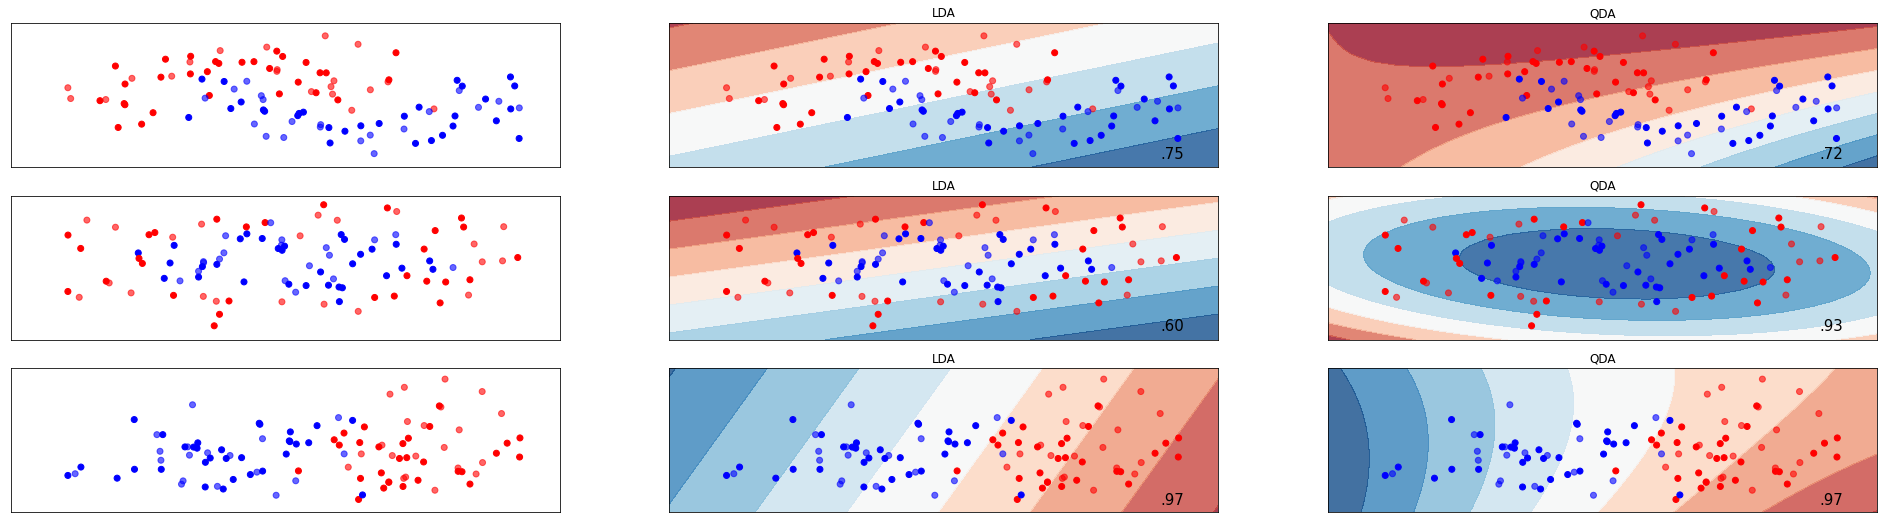

In [24]:
h = 0.2
names = ['LDA', 'QDA']
classifiers = [
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                          random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
           make_circles(noise=0.2, random_state=1, factor=0.5),
           linearly_separable]

figure = plt.figure(figsize=(27,9))
i = 1
# iterate over datasets
for ds in datasets:
    #preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    #just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        
        # Plot the decision boundary, For that, we will assign a color to each
        # point in the mesh [x_min, x_max] * [y_min, y_max]
        if hasattr(clf, 'decision_function'):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
        
        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap = cm_bright, alpha=0.6)
        
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), 
               size=15, horizontalalignment='right')
        i += 1
        
figure.subplots_adjust(left=.02, right=.98)
plt.show()

In [ ]:
- 빨간색 부분이 빨간색으로 classification 하는 것.
- 진한 것이 train, alpha로 투명하게 되어있는 것이 test.